In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Practice Assignment

Find the temperature distribution $u(x)$ in a rod defined on the interval $I = [2, 8]$, governed by the differential equation:

$$(a(x) u'(x))' = f(x), \quad \text{for } x \in [2, 8].$$

The conductivity and source term are given by
$$
a(x) = 0.1 (5 - 0.6x), \quad f(x) = 0.03 (x - 6)^4,
$$
and the boundary conditions are $u(2) = -1$, $u'(8) = 0$.

Your **goal** is to write a Python program to solve this problem using the finite element method. You must apply the **midpoint quadrature rule** for all integrals.

Feel free to use the following template:

In [ ]:

def load_assembler_1d(x, f_func):
    """
    TODO:
    Assemble the load vector 'b' from the source function 'f'.
    Use the midpoint rule for numerical integration over each element.

    Steps to implement:
    1. Compute the number of elements (n = len(x) - 1).
    2. Initialize the load vector b with zeros.
    3. Loop over all elements (intervals [x_i, x_{i+1}]):
        a. Compute element length h.
        b. Compute midpoint xmid.
        c. Evaluate f_func(xmid).
        d. Distribute the load contribution to b[i] and b[i+1].
    4. Return the assembled vector b.
    """
    # --- your code here ---
    pass


def stiffness_assembler_1d(x, a_func, kappa):
    """
    TODO:
    Assemble the global stiffness matrix 'A'.

    Steps to implement:
    1. Compute the number of elements and initialize A as a zero matrix.
    2. Loop over all elements:
        a. Compute element length h.
        b. Compute midpoint xmid.
        c. Evaluate a_func(xmid).
        d. Add local stiffness contributions to the global matrix A.
    3. Apply boundary conditions (Robin-type):
        - Add kappa[0] to A[0,0] and kappa[1] to A[-1,-1].
    4. Return A.
    """
    # --- your code here ---
    pass


def source_assembler_1d(x, f_func, kappa, g):
    """
    TODO:
    Assemble the source vector 'b' including boundary condition terms.

    Steps to implement:
    1. Call load_assembler_1d() to compute b from f_func.
    2. Apply boundary contributions:
        - Add kappa[0]*g[0] to b[0].
        - Add kappa[1]*g[1] to b[-1].
    3. Return the modified b.
    """
    # --- your code here ---
    pass


# -----------------------------
# MAIN SCRIPT
# -----------------------------
# Given input parameters
a, b = 2, 8
h = 0.1

# Define material and source functions
conductivity = lambda x: 0.1 * (5 - 0.6 * x)   # a(x)
source = lambda x: 0.03 * (x - 6)**4           # f(x)

# Boundary condition parameters (Robin BC)
kappa = np.array([1.e+6, 0])  # Penalty-like terms
g = np.array([-1, 0])         # Boundary values

# Create mesh points
x = np.arange(a, b + h, h)

# TODO:
# 1. Assemble stiffness matrix A using stiffness_assembler_1d
# 2. Assemble source vector b using source_assembler_1d
# 3. Solve the linear system A*u = b for u
# 4. Plot the solution

# Example structure:
# A = stiffness_assembler_1d(x, conductivity, kappa)
# b = source_assembler_1d(x, source, kappa, g)
# u = np.linalg.solve(A, b)

# Plot the solution u(x)
# plt.figure(figsize=(10, 6))
# plt.plot(x, u, marker='o', linestyle='-', label='Solution u(x)')
# plt.xlabel('x')
# plt.ylabel('u(x)')
# plt.title('1D Poisson Solver Solution')
# plt.grid(True)
# plt.legend()
# plt.show()

In [7]:
def load_assembler_1d(x, f_func):
    n = len(x) - 1
    b = np.zeros(len(x))

    for i in range(n):
        h = x[i+1] - x[i]
        xmid = 0.5 * (x[i] + x[i+1])
        fmid = f_func(xmid)

        # Element load vector: (fmid * h / 2) * [1, 1]^T
        contrib = fmid * h / 2.0
        b[i]     += contrib
        b[i+1]   += contrib

    return b


def stiffness_assembler_1d(x, a_func, kappa):
    n = len(x) - 1
    N = len(x)
    A = np.zeros((N, N))

    for i in range(n):
        h = x[i+1] - x[i]
        xmid = 0.5 * (x[i] + x[i+1])
        amid = a_func(xmid)

        # Local stiffness matrix for P1 with variable a(x)
        # K^e = (a(xmid)/h) * [[1, -1], [-1, 1]]
        K_loc = (amid / h) * np.array([[1.0, -1.0],
                                       [-1.0,  1.0]])

        A[i:i+2, i:i+2] += K_loc

    # Robin boundary terms
    A[0, 0]   += kappa[0]
    A[-1, -1] += kappa[1]

    return A


def source_assembler_1d(x, f_func, kappa, g):
    # Volume contributions
    b = load_assembler_1d(x, f_func)

    # Boundary contributions
    b[0]   += kappa[0] * g[0]
    b[-1]  += kappa[1] * g[1]

    return b

In [8]:
# -----------------------------
# MAIN SCRIPT
# -----------------------------
# Given input parameters
a, b = 2, 8
h = 0.1

# Define material and source functions
conductivity = lambda x: 0.1 * (5 - 0.6 * x)   # a(x)
source = lambda x: 0.03 * (x - 6)**4           # f(x)

# Boundary condition parameters (Robin BC)
kappa = np.array([1.e+6, 0])  # Penalty-like terms
g = np.array([-1, 0])         # Boundary values

# Create mesh points
x = np.arange(a, b + h, h)

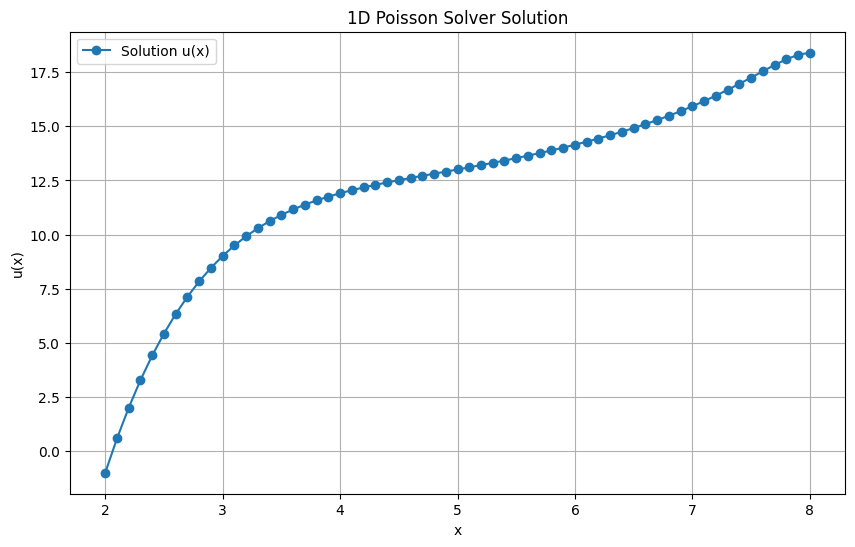

In [9]:
# 1. Assemble stiffness matrix A using stiffness_assembler_1d
# 2. Assemble source vector b using source_assembler_1d
# 3. Solve the linear system A*u = b for u
# 4. Plot the solution

# Example structure:
A = stiffness_assembler_1d(x, conductivity, kappa)
b = source_assembler_1d(x, source, kappa, g)
u = np.linalg.solve(A, b)

# Plot the solution u(x)
plt.figure(figsize=(10, 6))
plt.plot(x, u, marker='o', linestyle='-', label='Solution u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('1D Poisson Solver Solution')
plt.grid(True)
plt.legend()
plt.show()